In [48]:
import cv2
import torch
import pylab
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from PIL import Image

In [49]:
sample = torch.load('/home/yannik/vssil/eval/ulosd_vssil_new_128pix_more_samples/ulosd_sample_0/sample.pt')
sample.shape

torch.Size([1, 30, 3, 128, 128])

In [50]:
from src.utils.kpt_utils import kpts_2_img_coordinates

kpts = torch.load('/home/yannik/vssil/eval/ulosd_vssil_new_128pix_more_samples/ulosd_sample_0/key_points.pt')
kpts[..., :2] *= -1
img_coordinates = kpts_2_img_coordinates(kpts, sample.shape[-2:])
img_coordinates.shape

torch.Size([1, 30, 48, 3])

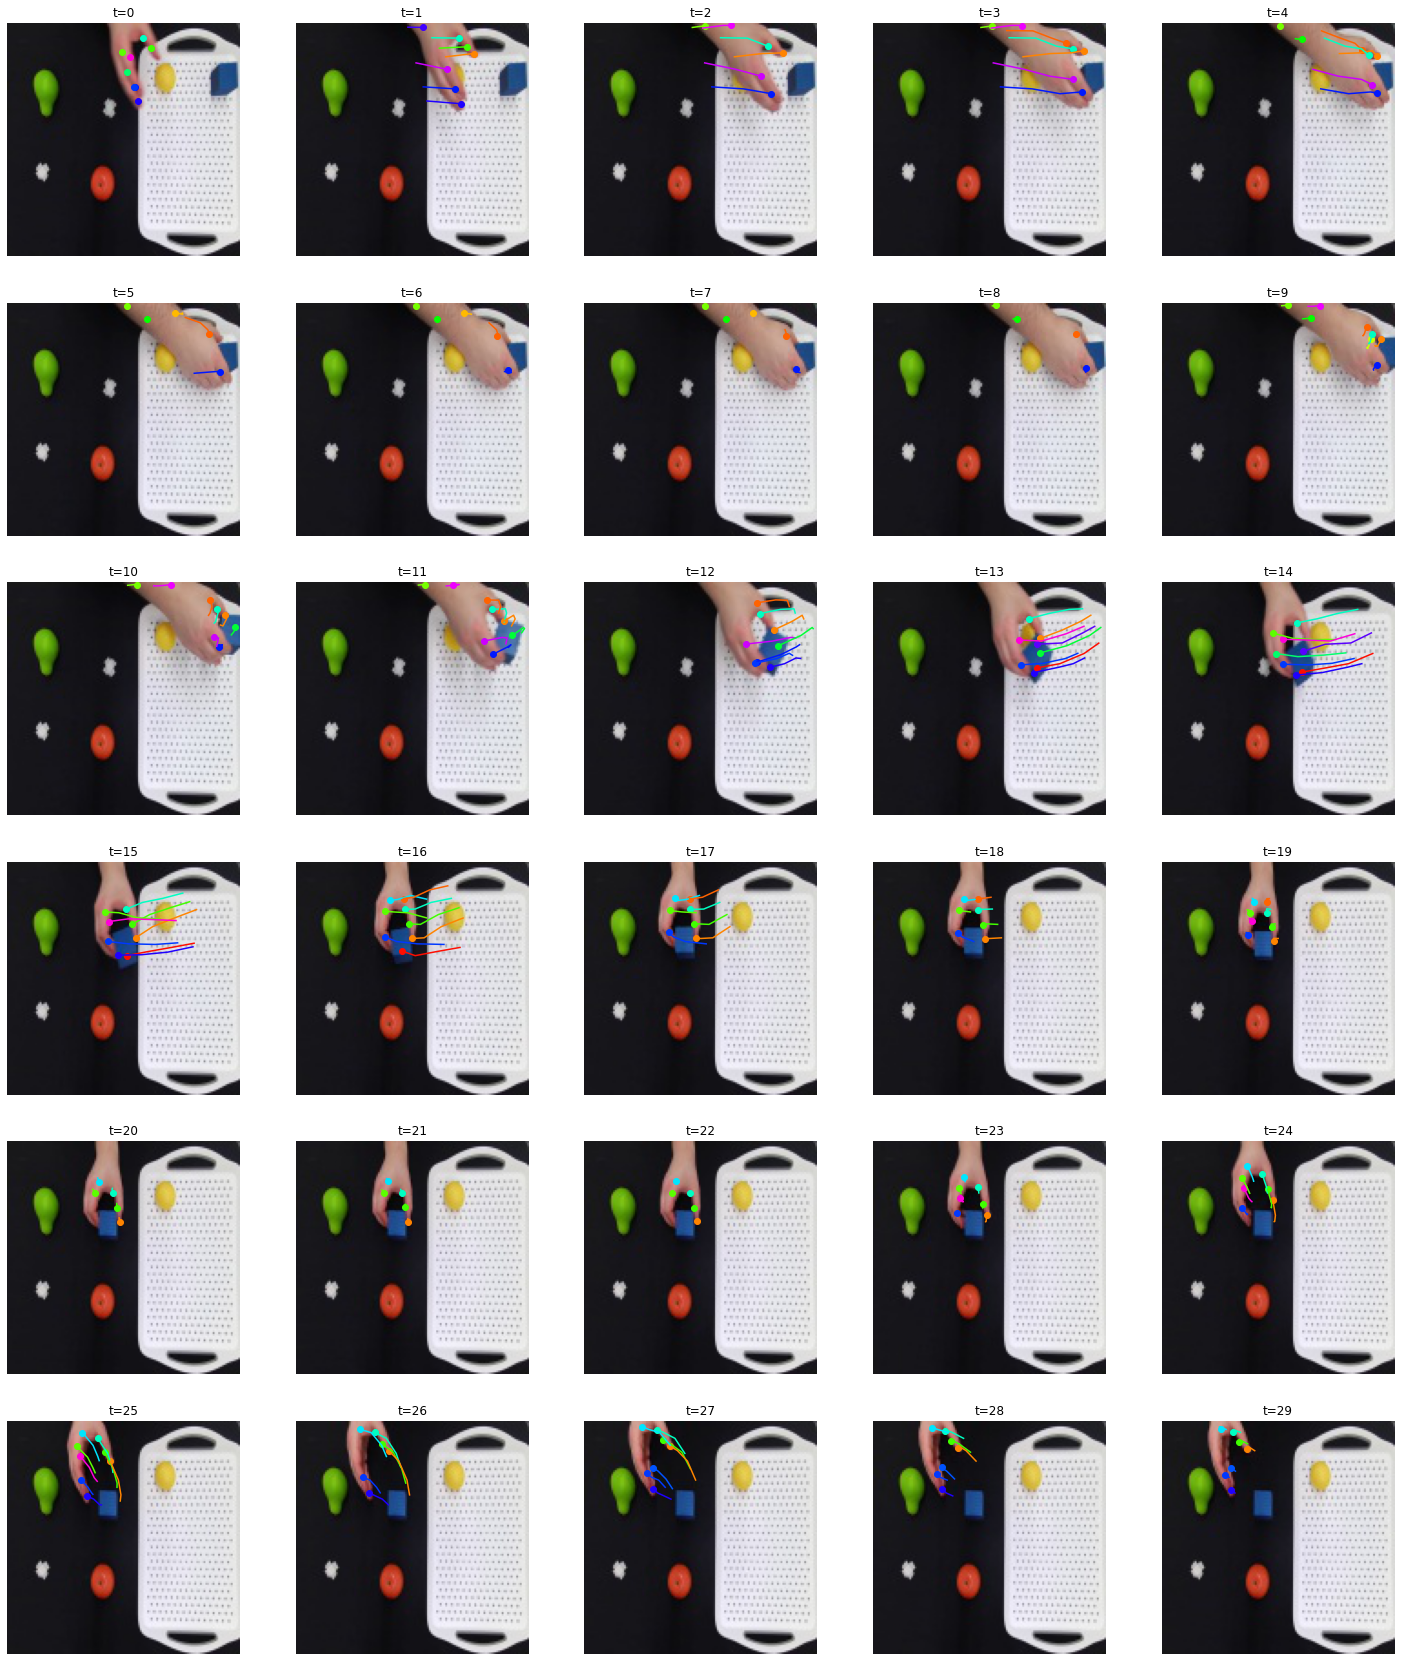

In [51]:
# ts = [0, 4, 9, 14, 19, 24, 29]
ts = range(30)
tl = 3

cm = pylab.get_cmap('gist_rainbow')

fig, ax = plt.subplots(len(ts)//5, 5, figsize=(25, (len(ts)//5)*5))
for i, t in enumerate(ts):
    ax[i//5, i%5].imshow(sample[0, t].permute(1, 2, 0))
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title(f't={t}')
    
    # Sorting key-points by intensity
    sort, ids = torch.sort(img_coordinates[0, t, :, 2], descending=True)
    
    for _k in range(8):
        if img_coordinates[0, t, ids[_k], 2] > 0.6:
            ax[i//5, i%5].scatter(img_coordinates[0, t, ids[_k], 0],
                                  img_coordinates[0, t, ids[_k], 1],
                                  #color='lime'
                                  color=cm(1.*int(ids[_k])/img_coordinates.shape[2])
                                 )
            ax[i//5, i%5].plot(img_coordinates[0, max(t-tl, 0):t+1, ids[_k], 0],
                               img_coordinates[0, max(t-tl, 0):t+1, ids[_k], 1],
                               #color='lime'
                               color=cm(1.*int(ids[_k])/img_coordinates.shape[2])
                              ) 
plt.show()

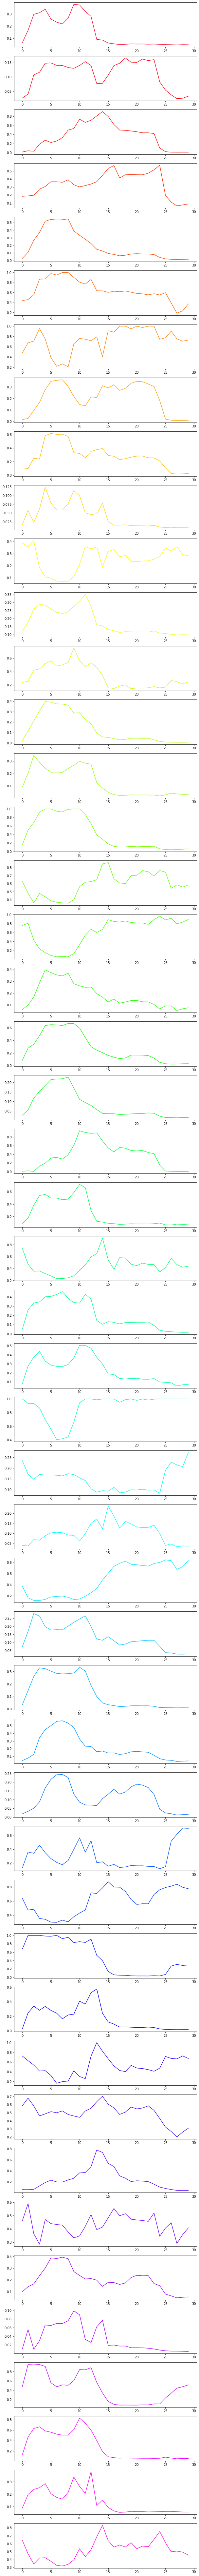

In [52]:
cm = pylab.get_cmap('gist_rainbow')
fig, ax = plt.subplots(img_coordinates.shape[2], 1, figsize=(10, img_coordinates.shape[2]*3))
for k in range(img_coordinates.shape[2]):
    ax[k].plot(img_coordinates[0, :, k, 2],
               color=cm(1.*k/img_coordinates.shape[2])              
              )
plt.show()

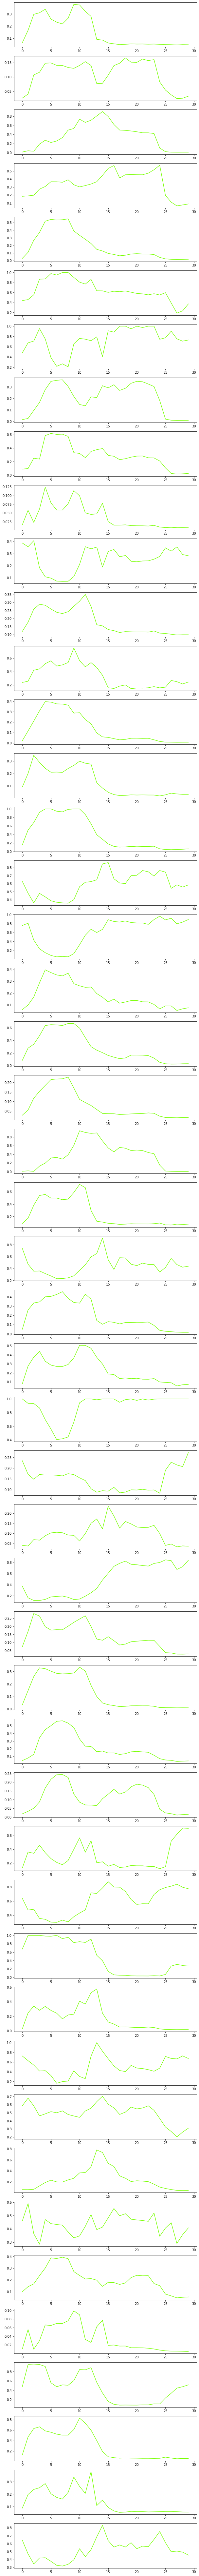

In [53]:
cm = pylab.get_cmap('gist_rainbow')
fig, ax = plt.subplots(img_coordinates.shape[2], 1, figsize=(10, img_coordinates.shape[2]*3))
for k in range(img_coordinates.shape[2]):
    max_intensity_timestep = int(torch.argmax(img_coordinates[0, :, ids[_k], 2]))
    ax[k].plot(img_coordinates[0, :, k, 2],
               color=cm(1.*max_intensity_timestep/img_coordinates.shape[2])              
              )
plt.show()

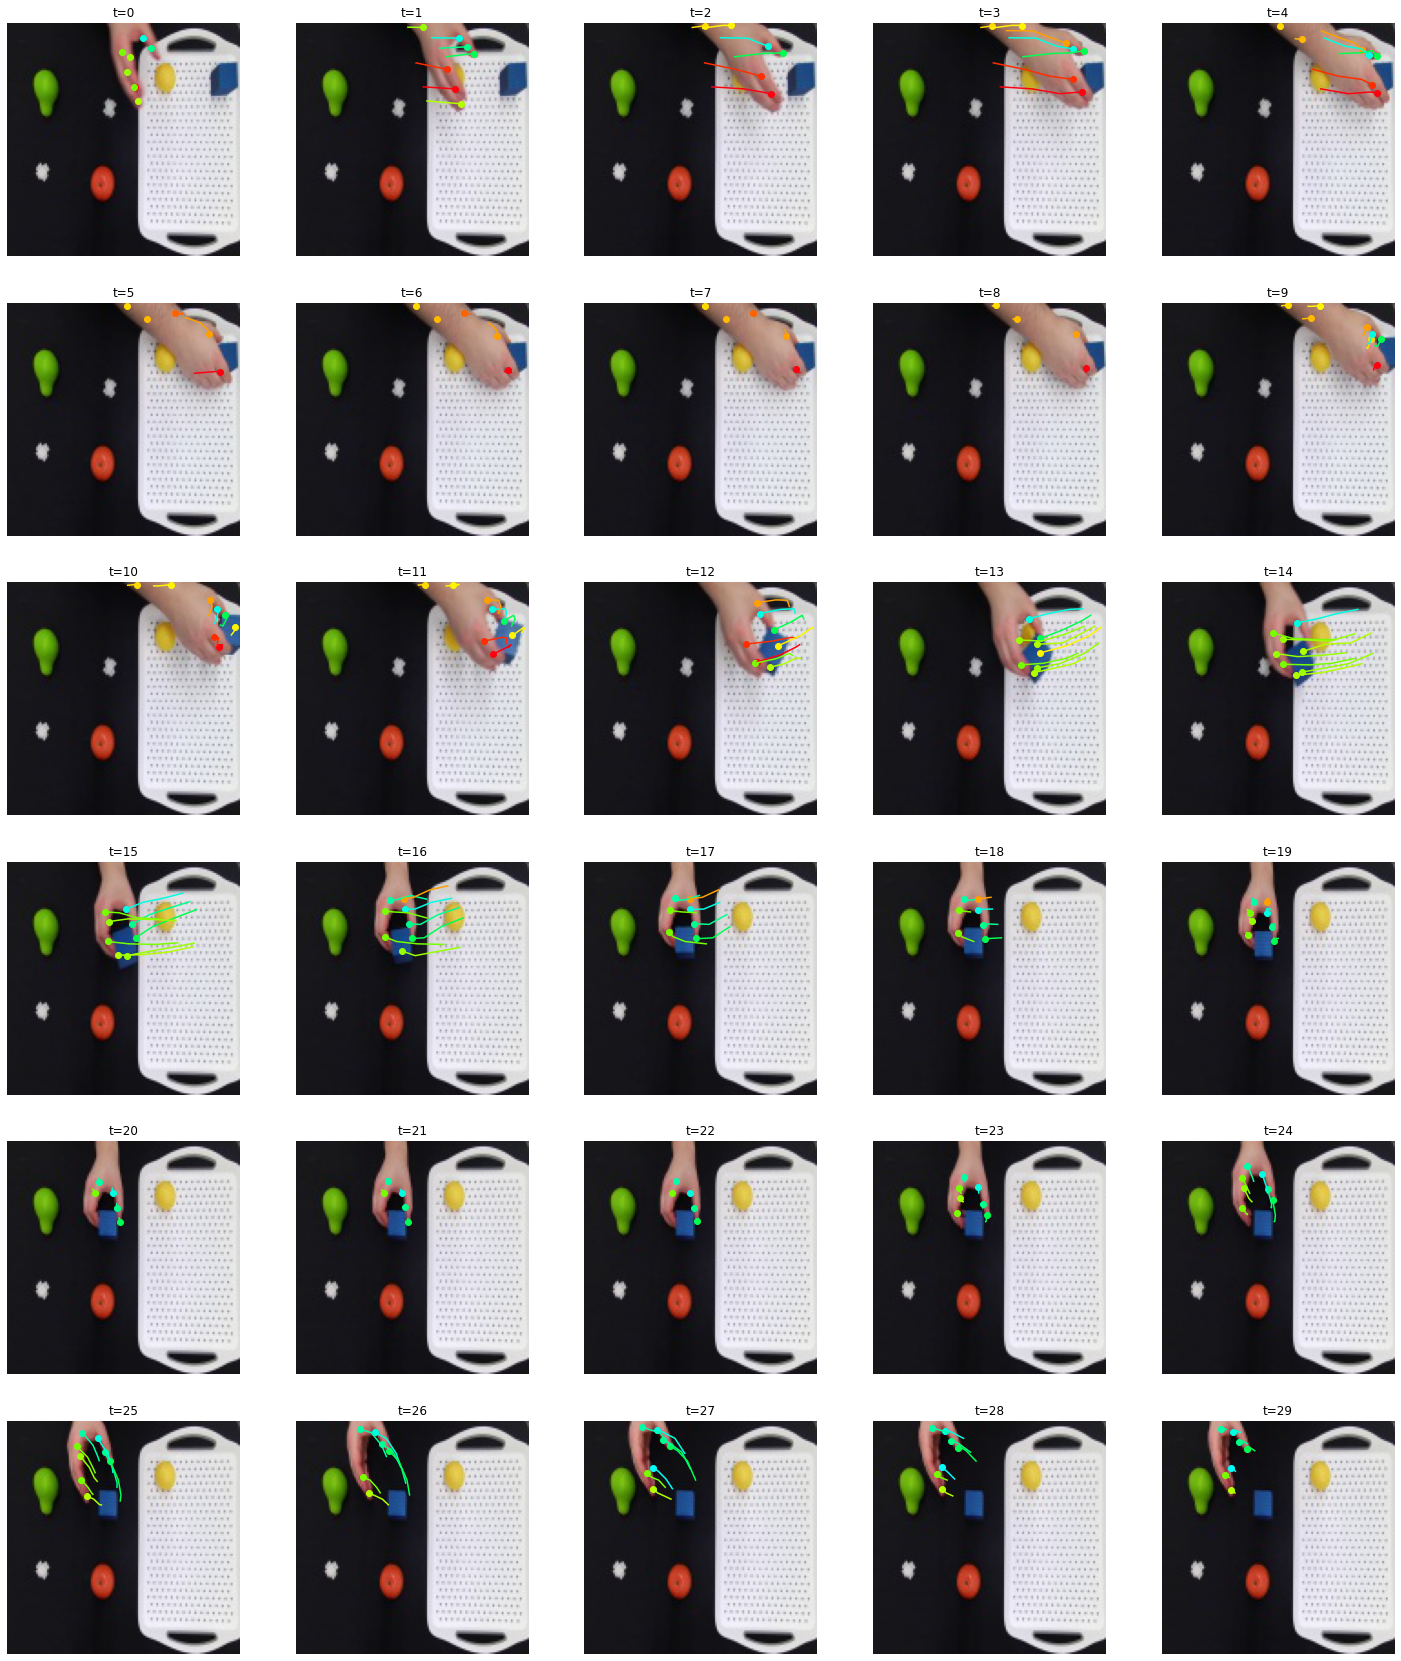

In [54]:
# ts = [0, 4, 9, 14, 19, 24, 29]
ts = range(30)
tl = 3

cm = pylab.get_cmap('gist_rainbow')

fig, ax = plt.subplots(len(ts)//5, 5, figsize=(25, (len(ts)//5)*5))
for i, t in enumerate(ts):
    ax[i//5, i%5].imshow(sample[0, t].permute(1, 2, 0))
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title(f't={t}')
    
    # Sorting key-points by intensity
    sort, ids = torch.sort(img_coordinates[0, t, :, 2], descending=True)
    
    # Now we color key-points based on the time-step of their max intensity, instead of their channel id
    for _k in range(8):
        
        max_intensity_timestep = int(torch.argmax(img_coordinates[0, :, ids[_k], 2]))
                
        if img_coordinates[0, t, ids[_k], 2] > 0.6:
            ax[i//5, i%5].scatter(img_coordinates[0, t, ids[_k], 0],
                                  img_coordinates[0, t, ids[_k], 1],
                                  #color='lime'
                                  color=cm(1.*max_intensity_timestep/img_coordinates.shape[2])
                                 )

            ax[i//5, i%5].plot(img_coordinates[0, max(t-tl, 0):t+1, ids[_k], 0],
                           img_coordinates[0, max(t-tl, 0):t+1, ids[_k], 1],
                           #color='lime'
                           color=cm(1.*max_intensity_timestep/img_coordinates.shape[2])
                          )      
plt.show()

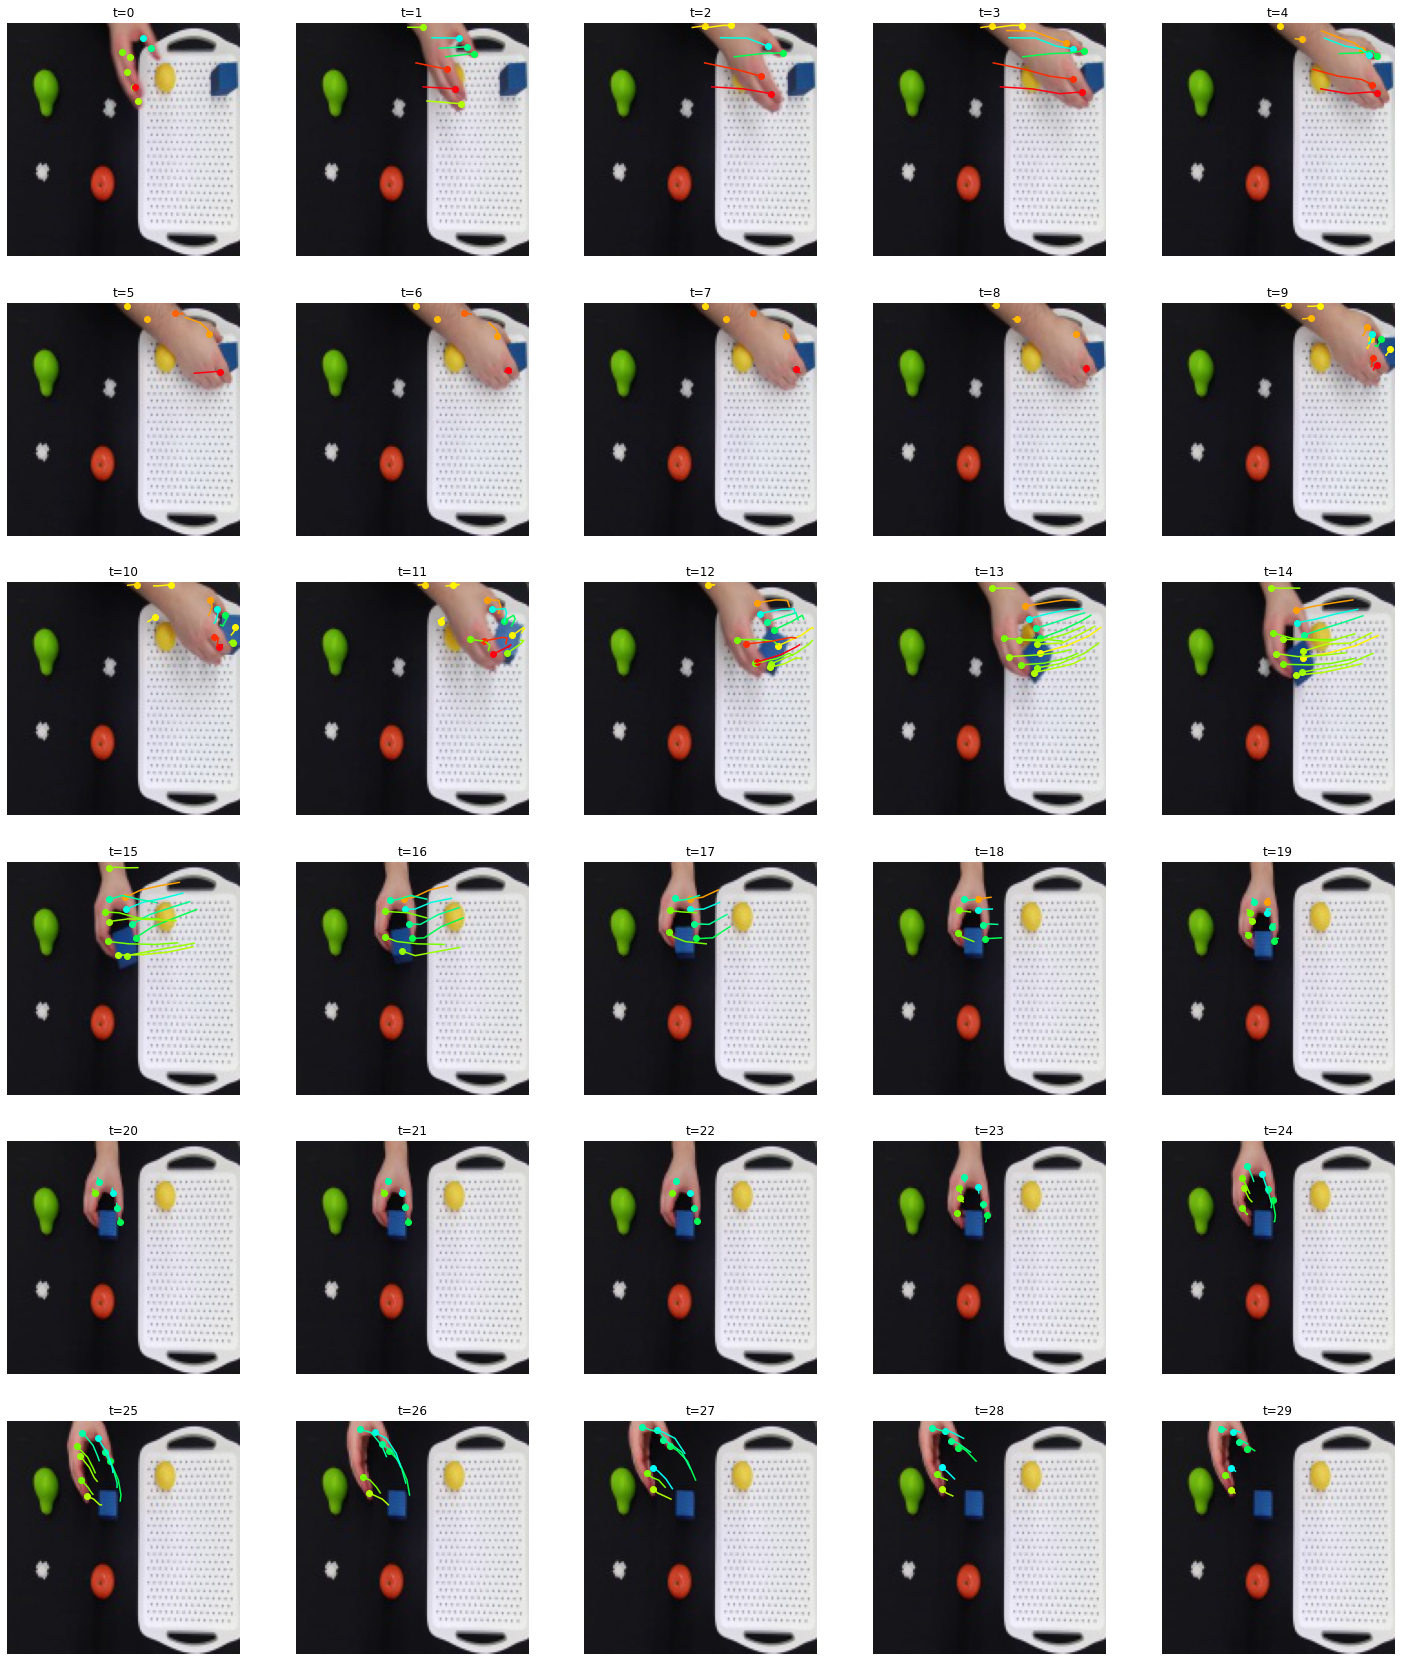

In [55]:
# ts = [0, 4, 9, 14, 19, 24, 29]
ts = range(30)
tl = 3

cm = pylab.get_cmap('gist_rainbow')

fig, ax = plt.subplots(len(ts)//5, 5, figsize=(25, (len(ts)//5)*5))
for i, t in enumerate(ts):
    ax[i//5, i%5].imshow(sample[0, t].permute(1, 2, 0))
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title(f't={t}')

    
    # Now we color key-points based on the time-step of their max intensity, instead of their channel id
    for k in range(img_coordinates.shape[2]):
        
        max_intensity_timestep = int(torch.argmax(img_coordinates[0, :, k, 2]))
                
        if img_coordinates[0, t, k, 2] > 0.6:
            ax[i//5, i%5].scatter(img_coordinates[0, t, k, 0],
                                  img_coordinates[0, t, k, 1],
                                  #color='lime'
                                  color=cm(1.*max_intensity_timestep/img_coordinates.shape[2])
                                 )

            ax[i//5, i%5].plot(img_coordinates[0, max(t-tl, 0):t+1, k, 0],
                           img_coordinates[0, max(t-tl, 0):t+1, k, 1],
                           #color='lime'
                           color=cm(1.*max_intensity_timestep/img_coordinates.shape[2])
                          )     
plt.show()